# Case Study 2: Stocks

In this study, we will analyze US stocks. We will work with the largest
of the market and use their index for comparison.

The cumulative portfolio return is often the primary metric of
interest to investors. In this study, we examine another critical metric
which is drawdown.

## Intro

### Instalations

In [1]:
!python -m pip install git+https://github.com/JakRys/finclust
!pip install yfinance
!pip install tslearn

### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

from finclust import PortfolioManager
from finclust.evaluation import QuantstatsEvaluator
from finclust.clustering import ScikitClusterer

from finclust.visualization import CumulativeReturnsVisualizator

## Get Data

Our scope will be the 500 largest US stocks by market capitalization.
The list of these is taken from the CompaniesMarketCap.com website.

For comparison, we will use the S&P100 index, representing the 100
largest US stocks by market capitalization. The data comes from Yahoo
Finance. We only use price values because of the chosen clustering
method. The data covers the period from 2009 to the beginning of
2020.

#### Stocks
Symbols are taken from [Companiesmarketcap.com](https://companiesmarketcap.com/usa/largest-companies-in-the-usa-by-market-cap/).

In [3]:
symbols = ['A', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACM', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFG', 'AFL', 'AGCO', 'AGR', 'AIG', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALL', 'ALNY', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMH', 'AMP', 'AMT', 'AMZN', 'AN', 'ANET', 'ANSS', 'APA', 'APD', 'APH', 'APO', 'AR', 'ARCC', 'ARE', 'ARES', 'ARMK', 'ATO', 'ATVI', 'AVB', 'AVGO', 'AVTR', 'AVY', 'AWK', 'AXON', 'AXP', 'AZO', 'AZPN', 'BA', 'BAC', 'BAH', 'BALL', 'BAX', 'BBWI', 'BBY', 'BDX', 'BEN', 'BF-A', 'BG', 'BIIB', 'BILL', 'BIO', 'BJ', 'BK', 'BKI', 'BKNG', 'BKR', 'BLDR', 'BLK', 'BMRN', 'BMY', 'BR', 'BRK-B', 'BRKR', 'BRO', 'BSX', 'BURL', 'BWA', 'BX', 'BXP', 'C', 'CAG', 'CAH', 'CAT', 'CBOE', 'CBRE', 'CCI', 'CCK', 'CCL', 'CDAY', 'CDNS', 'CDW', 'CE', 'CF', 'CFG', 'CG', 'CHD', 'CHRW', 'CHTR', 'CHWY', 'CI', 'CINF', 'CL', 'CLX', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNA', 'CNC', 'CNP', 'COF', 'COO', 'COP', 'COST', 'CPB', 'CPRT', 'CPT', 'CQP', 'CRL', 'CRM', 'CRWD', 'CSCO', 'CSGP', 'CSL', 'CSX', 'CTAS', 'CTRA', 'CTSH', 'CTVA', 'CUBE', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DAR', 'DD', 'DDOG', 'DE', 'DECK', 'DELL', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DINO', 'DIS', 'DKS', 'DLR', 'DLTR', 'DOCU', 'DOV', 'DOW', 'DOX', 'DPZ', 'DRI', 'DT', 'DTE', 'DUK', 'DVN', 'DXCM', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL', 'ELS', 'ELV', 'EMN', 'EMR', 'ENPH', 'ENTG', 'EOG', 'EPAM', 'EPD', 'EQH', 'EQIX', 'EQR', 'EQT', 'ERIE', 'ES', 'ESS', 'ET', 'ETR', 'ETSY', 'EVRG', 'EW', 'EWBC', 'EXC', 'EXPD', 'EXPE', 'EXR', 'F', 'FANG', 'FAST', 'FCNCA', 'FCX', 'FDS', 'FDX', 'FE', 'FHN', 'FICO', 'FIS', 'FISV', 'FITB', 'FIVE', 'FLT', 'FMC', 'FMCCT', 'FNF', 'FOX', 'FRC', 'FSLR', 'FTNT', 'FTV', 'FWONK', 'GD', 'GDDY', 'GE', 'GEN', 'GGG', 'GILD', 'GIS', 'GL', 'GLPI', 'GLW', 'GM', 'GOOG', 'GPC', 'GPN', 'GS', 'GWW', 'H', 'HAL', 'HBAN', 'HCA', 'HD', 'HEI', 'HES', 'HIG', 'HII', 'HLT', 'HOLX', 'HON', 'HPE', 'HPQ', 'HRL', 'HSIC', 'HST', 'HSY', 'HUBB', 'HUBS', 'HUM', 'HWM', 'IBKR', 'IBM', 'ICE', 'IDXX', 'IEP', 'IEX', 'IFF', 'ILMN', 'INCY', 'INTC', 'INTU', 'INVH', 'IP', 'IPG', 'IQV', 'IRM', 'ISRG', 'IT', 'ITW', 'J', 'JBHT', 'JBL', 'JKHY', 'JNJ', 'JNPR', 'JPM', 'K', 'KDP', 'KEY', 'KEYS', 'KHC', 'KIM', 'KKR', 'KLAC', 'KMB', 'KMI', 'KMX', 'KO', 'KR', 'L', 'LAMR', 'LBRDA', 'LDOS', 'LEN', 'LH', 'LHX', 'LII', 'LKQ', 'LLY', 'LMT', 'LNG', 'LNT', 'LOW', 'LPLA', 'LRCX', 'LSCC', 'LSI', 'LSXMB', 'LUV', 'LVS', 'LW', 'LYB', 'LYV', 'MA', 'MAA', 'MAR', 'MAS', 'MCD', 'MCHP', 'MCK', 'MCO', 'MDB', 'MDLZ', 'MET', 'META', 'MGM', 'MKC', 'MKL', 'MKTX', 'MLM', 'MMC', 'MMM', 'MMP', 'MNST', 'MO', 'MOH', 'MORN', 'MOS', 'MPC', 'MPLX', 'MPWR', 'MRK', 'MRNA', 'MRO', 'MRVL', 'MS', 'MSCI', 'MSFT', 'MSI', 'MTB', 'MTCH', 'MTD', 'MTN', 'MU', 'NBIX', 'NDAQ', 'NDSN', 'NEE', 'NEM', 'NET', 'NFE', 'NFLX', 'NI', 'NKE', 'NLY', 'NOC', 'NOW', 'NSC', 'NTAP', 'NTRS', 'NUE', 'NVDA', 'NVR', 'NWS', 'O', 'ODFL', 'OKE', 'OKTA', 'OMC', 'ON', 'ORCL', 'ORLY', 'OVV', 'OXY', 'PANW', 'PARA', 'PAYC', 'PAYX', 'PCAR', 'PCG', 'PCTY', 'PEAK', 'PEG', 'PEP', 'PFE', 'PFG', 'PFGC', 'PG', 'PGR', 'PH', 'PHM', 'PINS', 'PKG', 'PKI', 'PLD', 'PM', 'PNC', 'PODD', 'POOL', 'PPG', 'PPL', 'PRU', 'PSA', 'PSX', 'PTC', 'PWR', 'PXD', 'PYPL', 'QCOM', 'QRVO', 'RCL', 'REG', 'REGN', 'REXR', 'RF', 'RGA', 'RGEN', 'RJF', 'RMD', 'ROK', 'ROL', 'ROP', 'ROST', 'RPM', 'RS', 'RSG', 'RTX', 'SBAC', 'SBUX', 'SCCO', 'SCHW', 'SCI', 'SGEN', 'SHW', 'SIRI', 'SIVB', 'SJM', 'SLB', 'SNA', 'SNAP', 'SNPS', 'SNX', 'SO', 'SPG', 'SPGI', 'SPLK', 'SQ', 'SRE', 'SRPT', 'SSNC', 'STLD', 'STT', 'STZ', 'SUI', 'SWK', 'SWKS', 'SYF', 'SYK', 'SYY', 'T', 'TAP', 'TDG', 'TDY', 'TECH', 'TER', 'TFC', 'TFX', 'TGT', 'TJX', 'TMO', 'TMUS', 'TPL']
print(len(symbols))

500


In [4]:
import yfinance as yf

data = yf.download(
    tickers=symbols,
    start="2009-01-01",
    end="2020-01-01",
    interval="1d",
)
data.dropna(axis=1, how="all", inplace=True) 

[*********************100%***********************]  500 of 500 completed


#### Index

[*********************100%***********************]  1 of 1 completed


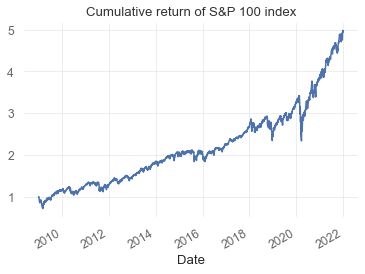

In [5]:
SandP100 = yf.download(
    tickers=["^SP100"],
    period="2y",
    start="2009-01-01",
    end="2022-01-01",
    interval="1d",
)["Close"]

(SandP100/SandP100.iloc[0]).plot()
plt.title("Cumulative return of S&P 100 index")
plt.show()

## Run

Stocks are not as volatile as cryptocurrencies, so we rebalance quarterly. This means that we set the `step` parameter to 16 weeks. The time
`window` for clustering is 56 weeks. To cluster, we use the `TimeSeriesKMeans` method from the _tslearn_ package. This method works
directly with time series, so we use only one data attribute, which is
price. It is based on random initialization. For reproducibility, we use
a fixed random state. However, for real-world use, we recommend
setting the `n_init` parameter to a large enough number to limit the randomness of the process as much as possible.

In [6]:
from sklearn.metrics.pairwise import nan_euclidean_distances
from tslearn.clustering import TimeSeriesKMeans

## Create instance of PortfolioManager
mgr = PortfolioManager(
    window = timedelta(weeks=56),
    step = timedelta(weeks=14),
    clusterer = ScikitClusterer(
        cluster_method = TimeSeriesKMeans(n_clusters = 3, n_jobs=-1, random_state=42),
    ),
    evaluator = QuantstatsEvaluator(as_pct=True),
    evaluate_baseline=True,
    baseline_prices=SandP100,
    baseline_name="S&P 100",
)

## Run the process
mgr.run(data=data["Adj Close"].fillna(method="ffill").fillna(method="bfill"))

16:03:45.034 Calculating returns
16:03:45.058 Calculating clusters
16:03:48.140 Calculating returns of portfolios
16:03:48.411 Evaluating baseline
16:03:48.821 Evaluating cluster portfolios
16:03:49.929 Run completed.
____________________________________
Duration of the run: 0:00:04.895942.



/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,S&P 100,TimeSeriesKMeans-0.0,TimeSeriesKMeans-1.0,TimeSeriesKMeans-2.0,TimeSeriesKMeans-nan
Start Period,2010-01-29,2010-01-29,2010-01-29,2010-01-29,2010-01-29
End Period,2019-12-31,2019-12-31,2019-12-31,2019-12-31,2019-12-31
Risk-Free Rate,0,0,0,0,0
Time in Market,100.0,100.0,100.0,100.0,0
Cumulative Return,191.29,428.07,378.75,392.3,0
CAGR﹪,11.37,18.25,17.09,17.42,0
Sharpe,0.81,1.29,1.19,1.2,-
Prob. Sharpe Ratio,99.44,100.0,99.99,99.99,-
Sortino,1.14,1.84,1.7,1.71,-
Sortino/√2,0.81,1.3,1.2,1.21,-


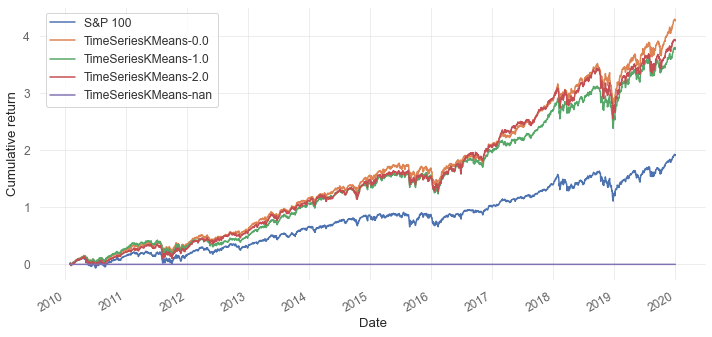

In [7]:
visualizator = CumulativeReturnsVisualizator(
    figsize=(10, 5),
)

visualizator.visualize(mgr)
plt.tight_layout()
plt.title("")
# plt.savefig("outputs/cumret_CS2-stocks.pdf")
plt.show()

We found a portfolio that **outperformed the index** on a drawdown scale.
The longest drawdown of even more portfolios was shorter than that of the index.
Other drawdown metrics also outperformed the index, although the difference is slight.

### Second Run - for Appendix

In this section, we show the result of the _Spectral Clustering_ method. Note
that _Spectral Clustering_ contains a random component. Therefore, in
this case, we also used a fixed random state. We used the `euclidian distance` method to calculate affinities.

In [8]:
from sklearn.cluster import SpectralClustering

## Create instance of PortfolioManager
mgr = PortfolioManager(
    window = timedelta(weeks=56),
    step = timedelta(weeks=14),
    affinity_func = nan_euclidean_distances,
    clusterer = ScikitClusterer(
        cluster_method = SpectralClustering(affinity = "precomputed", n_clusters = 3, random_state=42),
    ),
    evaluator = QuantstatsEvaluator(as_pct=True),
    evaluate_baseline=True,
    baseline_prices=SandP100,
    baseline_name="S&P 100",
)

## Run the process
mgr.run(data=data["Adj Close"].fillna(method="ffill").fillna(method="bfill"))


16:03:50.329 Calculating returns
16:03:50.347 Calculating affinities
16:03:52.060 Calculating clusters
16:04:38.071 Calculating returns of portfolios
16:04:38.352 Evaluating baseline
16:04:38.736 Evaluating cluster portfolios
16:04:39.484 Run completed.
____________________________________
Duration of the run: 0:00:49.156486.



,S&P 100,SpectralClustering-0,SpectralClustering-1,SpectralClustering-2
Start Period,2010-01-29,2010-01-29,2010-01-29,2010-01-29
End Period,2019-12-31,2019-12-31,2019-12-31,2019-12-31
Risk-Free Rate,0,0,0,0
Time in Market,100.0,100.0,10.0,13.0
Cumulative Return,191.29,440.24,7.98,36.44
CAGR﹪,11.37,18.52,0.78,3.18
Sharpe,0.81,1.28,0.17,0.45
Prob. Sharpe Ratio,99.44,100.0,70.54,92.62
Sortino,1.14,1.81,0.25,0.72
Sortino/√2,0.81,1.28,0.17,0.51


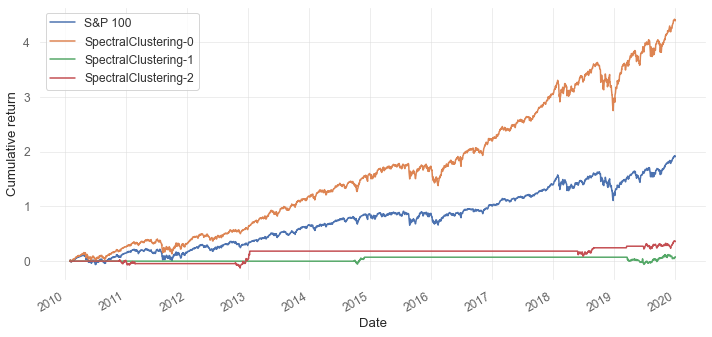

In [9]:
visualizator = CumulativeReturnsVisualizator(
    figsize=(10, 5),
)

visualizator.visualize(mgr)
plt.tight_layout()
plt.title("")
# plt.savefig("outputs/cumret_CS2-stocks_SpectralClustering.pdf")
plt.show()

One portfolio **outperformed the index** by longest drawdown. The
cumulative return is also higher. The size of the maximum drawdown
is almost identical.

In contrast, the other two portfolios obtained using the Spectral
Clustering method performed significantly worse on all metrics examined.